In [76]:
#Step 1: import libraies 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
# Step 2: Load and Preview the Data
# Replace with your actual file path
data = pd.read_csv('/Users/ankita/Downloads/Data Science Job Salaries.csv')

In [80]:
print(data.head())
print(data.info())

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [82]:
# Data Cleaning
# Check for missing values
print(data.isnull().sum())

# Fill missing values safely
data['salary_in_usd'] = data['salary_in_usd'].fillna(data['salary_in_usd'].median())
data['company_size'] = data['company_size'].fillna('Unknown')

# Drop critical rows (job title / experience level)
data.dropna(subset=['job_title', 'experience_level'], inplace=True)
# Standardize text
data['job_title'] = data['job_title'].str.lower()
data['company_size'] = data['company_size'].str.capitalize()

print(data.isnull().sum())



Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [84]:
#Step 4: Feature Engineering

# Encode ordinal categorical variables
data['experience_level'] = data['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
data['employment_type'] = data['employment_type'].map({'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3})

# Create derived feature
data['salary_ratio'] = data['salary'] / data['salary_in_usd']

# Print grouped salary by company size
grouped_salary = data.groupby('company_size')['salary_in_usd'].mean()
print(grouped_salary)


company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


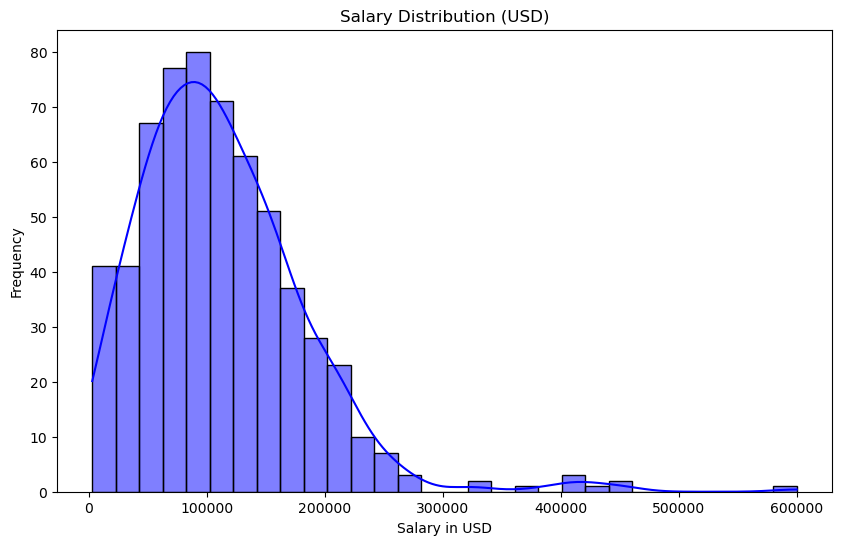

In [86]:
# Step 5: Exploratory Data Analysis

# 5.1 Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()



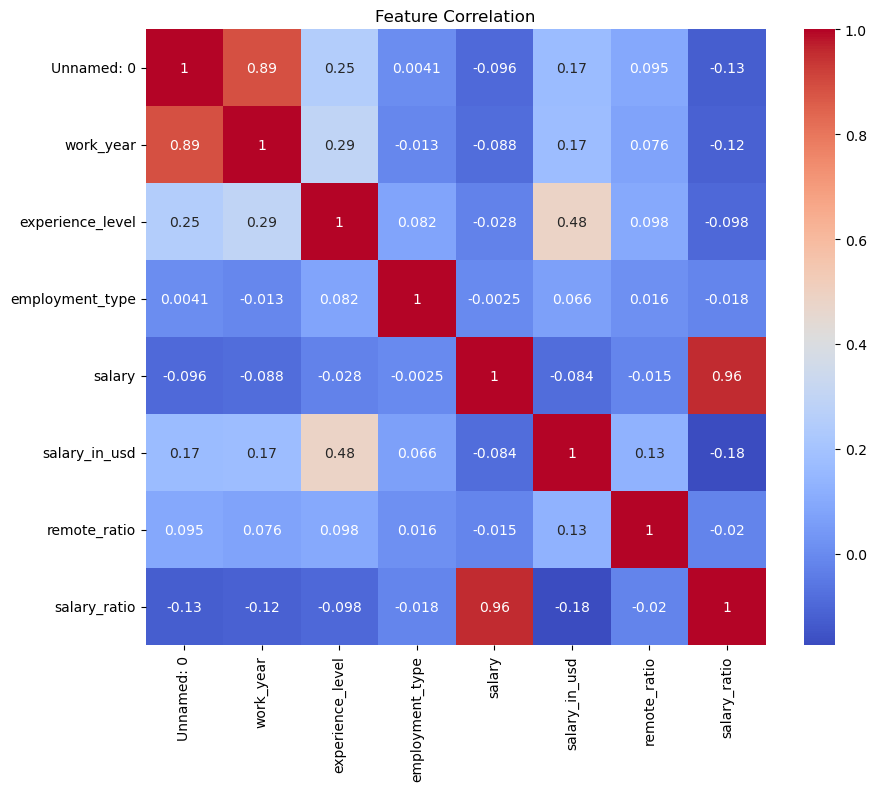

In [88]:
# 5.2 Correlation Heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

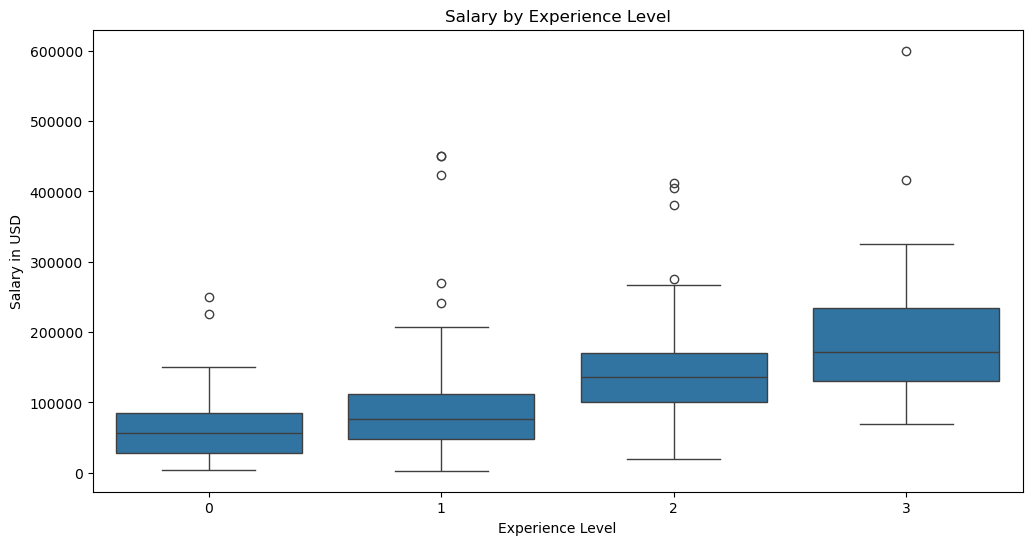

In [90]:
# 5.3 Salary by Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


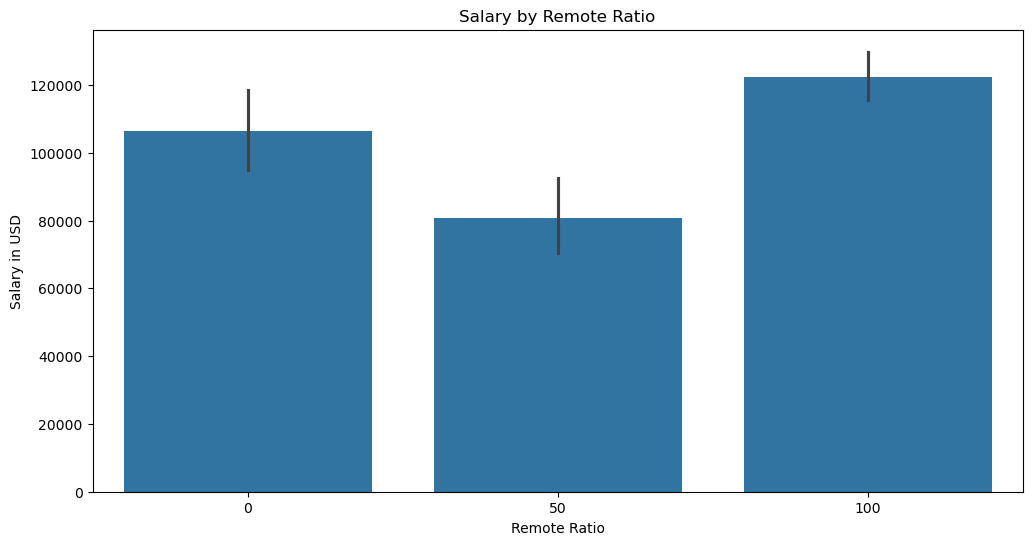

In [92]:
# Salary by Remote Ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

In [94]:
#Step 6: Linear Regression Modeling


# One-hot encode company_size (nominal categorical)
data_model = pd.get_dummies(data, columns=['company_size'], drop_first=True)

# Define feature columns
features = ['experience_level', 'employment_type', 'remote_ratio'] + \
           [col for col in data_model.columns if col.startswith('company_size_')]

# Prepare X and y
X = data_model[features]
y = data_model['salary_in_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 2935917983.807891
Mean Absolute Error: 39987.33929001008


In [96]:
st.title('Data Science Job Salaries')

# Show summary statistics
st.write("Summary Statistics:")
st.write(data.describe())

# Line chart of salaries
st.write("Salary Trend Over Index:")
st.line_chart(data['salary_in_usd'])

# Filter by job title
job_filter = st.selectbox('Select Job Title:', data['job_title'].unique())
filtered_data = data[data['job_title'] == job_filter]

# Bar chart of salaries for selected job title
st.write(f"Salaries for: {job_filter}")
st.bar_chart(filtered_data['salary_in_usd'])

2025-05-28 19:41:11.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 19:41:11.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()